# Car Versus Chair

## Purpose

Tell the difference between cars and chairs even though we sit in both.

## Details

Load the needed libraries.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

I got the images with this command in the unix shell:
```
python /home/paperspace/anaconda3/envs/fastai/bin/googleimagesdownload -f png -k cars -o . -i cars -nn -l 20
```
The -f option set the file extension. To make sure the images in the train directory are not the same as those in the valid one, I used different extensions. I did that from both the directories /home/paperspace/data/carschairs/train and /home/paperspace/data/carschairs/valid. I consider that a whimp out... I should use Jupeter Notebook, let me try to add to the connection...

In [4]:
things = ['car', 'chair']
extensions = {'train':'jpg', 'valid':'png'}
get_this_many = {'train':100, 'valid':20}
root_dir = "/home/paperspace/data/carschairs"

for thing in things:
    for data_dir, number in get_this_many.items():
        cmd = "python /home/paperspace/anaconda3/envs/fastai/bin/googleimagesdownload -f {ext} -k {t} -o {r}/{dd} -i {t}s -nn -l {n}".format(
               ext=extensions[data_dir], t=thing, r=root_dir, dd=data_dir, n=number)
        print(cmd)
        !$cmd

python /home/paperspace/anaconda3/envs/fastai/bin/googleimagesdownload -f jpg -k car -o /home/paperspace/data/carschairs/train -i cars -nn -l 100

Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Completed Image ====> 1. 2019-mclaren-senna-hypercar-official-photos-and-info-news-car-and-driver-photo-698055-s-original.jpg
Completed Image ====> 2. img_0444-2.jpg
Completed Image ====> 3. bmw-ta.jpg
Completed Image ====> 4. 7817.jpg
Completed Image ====> 5. 592f4169b74af41b008b5977-750-563.jpg
Completed Image ====> 6. 2016-ford-mustang-gt-burnout-red-tire-smoke.jpg
Completed Image ====> 7. 2018_genesis_g80_angularfront.jpg
Completed Image ====> 8. cr-cars-inlinehero-2018-honda-cr-v-driving-3-18.jpg
Completed Image ====> 9. 25-future-cars-worth-waiting-for.jpg
Completed Image ====> 10. 2015-tesla-model-s-90d-black-profile-in-front-of-modern-house.jpg
Completed Image ====> 11. a182669_medium.0.jpg
IOError on an image...trying next one... Error: The read operation timed out
C

Completed Image ====> 12. elantra-768x432v5.png
Completed Image ====> 13. hero-car.png
Completed Image ====> 14. icar_800x400.png
Completed Image ====> 15. car-model-kristen-bell-smiling-sm.png
Completed Image ====> 16. 1522248468037.png
Completed Image ====> 17. audi-a4-car-png
Completed Image ====> 18. 1522248333860.png
Completed Image ====> 19. 2017-ford-mustang-ecoboost-convertible-silver_featured.png
Completed Image ====> 20. au-compact-group-image-v2.png

Errors: 0


Everything downloaded!
Total time taken: 6.990971326828003 Seconds
python /home/paperspace/anaconda3/envs/fastai/bin/googleimagesdownload -f jpg -k chair -o /home/paperspace/data/carschairs/train -i chairs -nn -l 100

Item no.: 1 --> Item name = chair
Evaluating...
Starting Download...
Completed Image ====> 1. ekedalen-chair-brown__0516603_pe640439_s4.jpg
Completed Image ====> 2. 18808911?wid=328&hei=328&qlt=80&fmt=pjpeg.jpg
Completed Image ====> 3. 50
Completed Image ====> 4. 01-28.35.05.96_chair_hayden-28.35.05.96.

Completed Image ====> 10. chair.png
Completed Image ====> 11. boston-rocker-red3.png
Completed Image ====> 12. chloe-tan-hairdressing-salon-chair.png
Completed Image ====> 13. default_name.png
Completed Image ====> 14. tilly.png
Completed Image ====> 15. chair-sg1c-blu51-chrm.png
Completed Image ====> 16. pdp-th-2.png
Completed Image ====> 17. 160564_01.png
Completed Image ====> 18. kosmos-charcoal-silver_grande.png
Completed Image ====> 19. 170999-hondo-website-assets-studio-tech-features-module-withcupholder-920x850.png
Completed Image ====> 20. vineyard-chair-med.png

Errors: 1


Everything downloaded!
Total time taken: 12.230313777923584 Seconds


In [5]:
# Where the images live.
PATH = "data/carschairs/"
# Specific info needed by the functions.
arch=resnet34
sz=224

# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 5)

100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.58768  0.78638  0.80114]                    
[ 1.       0.32037  0.17103  0.94673]            
[ 2.       0.21733  0.09622  0.95454]            
[ 3.       0.15781  0.06757  0.95454]            
[ 4.       0.12166  0.94825  0.90909]            



Nice! It is possible to do command line things from a notebook. One minor thing: it required a dollar sign to get the bang command to work: !$cmd, not !cmd.

In [6]:
data.classes

['cars', 'chairs']

In [7]:
log_preds = learn.predict()
log_preds.shape

(75, 2)

In [8]:
log_preds

array([[ -0.     , -12.9194 ],
       [ -0.00619,  -5.08784],
       [ -0.00001, -11.18929],
       [ -0.00007,  -9.51928],
       [ -0.00001, -11.37912],
       [ -0.00009,  -9.28134],
       [ -0.00008,  -9.41058],
       [ -0.     , -14.04914],
       [ -0.00022,  -8.39973],
       [ -0.00004, -10.21008],
       [ -0.00048,  -7.6435 ],
       [ -0.00005,  -9.85658],
       [ -0.00001, -11.84556],
       [ -0.00001, -11.72602],
       [ -0.00489,  -5.324  ],
       [ -0.00006,  -9.69771],
       [ -0.00001, -12.12107],
       [ -0.00003, -10.3899 ],
       [ -0.00002, -10.87638],
       [ -0.00001, -12.00067],
       [ -0.00004, -10.10031],
       [ -0.     , -13.14926],
       [ -0.00002, -10.61224],
       [ -0.     , -14.2129 ],
       [ -0.0337 ,  -3.40691],
       [ -0.00002, -11.02948],
       [ -0.00001, -11.20378],
       [ -0.00001, -11.37912],
       [ -0.     , -14.4404 ],
       [ -0.     , -13.2064 ],
       [ -0.00003, -10.48469],
       [ -0.00002, -10.70759],
       [

In [9]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [10]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


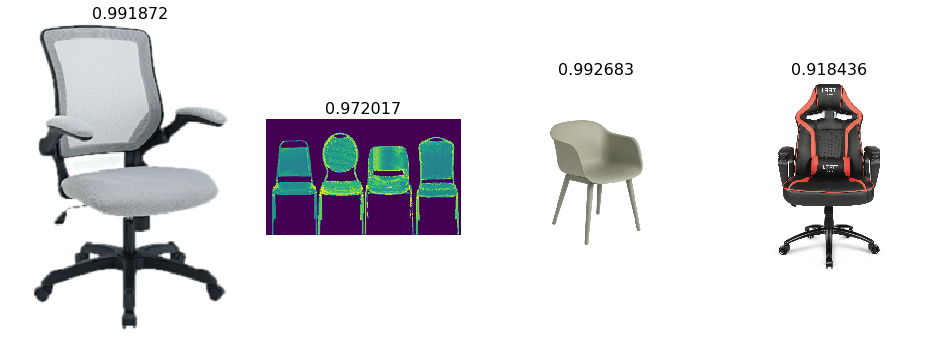

In [11]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Most uncertain predictions


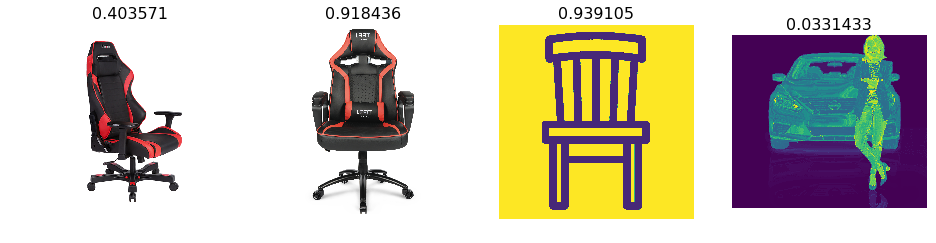

In [12]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

Not bad for 100 images.

## Comments...